# Fashion Online Store

## A. Problem Statement

Company A sells fashion. They have stores in each country’s capital: UK (London); FR (Paris); IT (Milan); GER (Berlin). Their customers either buy online or in the store itself.

At the same time, it maintains a website of individual product pages with write ups and images about the page. In some cases, the page might have gone up after the product was put up for sale.

In the scope this this work, based on the given data, I will identify RFM Customer Segmentation using Kmeans Clustering.


R-F-M is presented for:
- Recency : the most recent purchased data
- Frequency : the frequency of purchase
- Monetary : the total amount of purchase

## B. Summary Insight

**1. There are 3 main Cluster in customer segmentation**:

    1. Cluster 1 (avg ~ 46%): recent purchase, average expense/user, average quantity -> interested in average-high fashion brand segment

    2. Cluster 2 (avg ~ 46%): recent purchse, average expense/user, high quantity -> interested in average-low fashion brand segment

    3. Cluster 3 (avg 5%): not recent purchase, average expense/user, low quantity -> interested in the low-price item (eg accesorise...)

- There is a similar clusters ratio between different market but UK, customer in UK have a tendency to choose average high fashion brand slightly higer than other(50% compared to ~46%), and they least interested in low price item(only 3%.)

**2. Detail in age range**:
- 11-20 : Adolescence generation in UK pay more attention to Fashion more than other country(15%), double than Italia does(6.5%)
- 21-30 : no significant different in countries
- 41 - 50: In Italia, U50 has slightly higher concern about Fashion slighly higher than other age range. Ageing population might be a reason for this trend
- Over 51 : least interested in fashion compare to others age group in all country
    


## C. Solution

In [108]:
# Import library
import pandas as pd
import numpy as np
import os
import seaborn as sns
from datetime import date
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')


#### 1. Import File 1 exce; files with 3 sheets seperate

In [4]:
items=pd.read_excel("D:\DA on da way\OverAll Course Lv1\Level 3 Python start 30062023\Class 3 08 07 2023\[On class] Fashion online store\customers(UK).xlsx", sheet_name="Items")
customerinfo=pd.read_excel("D:\DA on da way\OverAll Course Lv1\Level 3 Python start 30062023\Class 3 08 07 2023\[On class] Fashion online store\customers(UK).xlsx", sheet_name="customer info")
customertransaction=pd.read_excel("D:\DA on da way\OverAll Course Lv1\Level 3 Python start 30062023\Class 3 08 07 2023\[On class] Fashion online store\customers(UK).xlsx", sheet_name="Customer transactions")


#### 2. Import 1 folder with 12 excel files then concat it together

In [6]:
# os.listdir : is used to get the list of all files in the specified directory.
# If we dont specify any directory, then list of files n directories in the current working directory will be returned

files = [file for file in os.listdir("D:\DA on da way\OverAll Course Lv1\Level 3 Python start 30062023\Class 3 08 07 2023\[On class] Fashion online store\Traffic")]

all_months_data=pd.DataFrame()

for file in files:
    df=pd.read_excel("D:\DA on da way\OverAll Course Lv1\Level 3 Python start 30062023\Class 3 08 07 2023\[On class] Fashion online store\Traffic\\"+file)
    all_months_data=pd.concat([all_months_data, df])
    
all_months_data.head()
   


,Page URL,users,uniquePageviews,pageviews,Brand,Posted On (DD/MM/YYYY)
0,/2020/1/032irview0.686128260621012,5669.2,5777.8,6286.4,"Ki)D3jDmA,RIP68X",2020-01-10 16:56:13
1,/2020/1/070ttream0.518887735674677,359.8,370.4,403.4,GO4582ey<S!+k1VE,2020-01-10 05:04:35
2,/2020/1/070htream0.333307794468401,587.6,614.2,657.6,G.Kb^jz*soY!(-4Q,2020-01-16 23:27:08
3,/2020/1/100Grseys0.271522111052549,1284.0,1308.6,1385.4,Dr|vm[-5p~56Y\mk,2020-01-17 12:32:24
4,/2020/1/100[nside0.645837365801341,1846.0,1880.8,2025.0,Dr|vm[-5p~56Y\mk,2020-01-23 05:21:08


#### Read in updated dataframe

In [8]:
all_data = pd.read_csv("all_data.csv")
all_data.head(5)

,Page URL,users,uniquePageviews,pageviews,Brand,Posted On (DD/MM/YYYY)
0,/2020/1/032irview0.686128260621012,5669.2,5777.8,6286.4,"Ki)D3jDmA,RIP68X",2020-01-10 16:56:13
1,/2020/1/070ttream0.518887735674677,359.8,370.4,403.4,GO4582ey<S!+k1VE,2020-01-10 05:04:35
2,/2020/1/070htream0.333307794468401,587.6,614.2,657.6,G.Kb^jz*soY!(-4Q,2020-01-16 23:27:08
3,/2020/1/100Grseys0.271522111052549,1284.0,1308.6,1385.4,Dr|vm[-5p~56Y\mk,2020-01-17 12:32:24
4,/2020/1/100[nside0.645837365801341,1846.0,1880.8,2025.0,Dr|vm[-5p~56Y\mk,2020-01-23 05:21:08


### 3. Exploring + Enrich data set ( tail, head, describe...)

In [10]:
#add revenue column
items['Revenue']=items['SellPrice']-items['CostPrice']

In [11]:
#convert data type in all_Data
all_data['Posted On Day']=pd.to_datetime(all_data['Posted On (DD/MM/YYYY)']).dt.date
all_data['Posted On Month']=pd.to_datetime(all_data['Posted On (DD/MM/YYYY)']).dt.month
all_data.head()

,Page URL,users,uniquePageviews,pageviews,Brand,Posted On (DD/MM/YYYY),Posted On Day,Posted On Month
0,/2020/1/032irview0.686128260621012,5669.2,5777.8,6286.4,"Ki)D3jDmA,RIP68X",2020-01-10 16:56:13,2020-01-10,1
1,/2020/1/070ttream0.518887735674677,359.8,370.4,403.4,GO4582ey<S!+k1VE,2020-01-10 05:04:35,2020-01-10,1
2,/2020/1/070htream0.333307794468401,587.6,614.2,657.6,G.Kb^jz*soY!(-4Q,2020-01-16 23:27:08,2020-01-16,1
3,/2020/1/100Grseys0.271522111052549,1284.0,1308.6,1385.4,Dr|vm[-5p~56Y\mk,2020-01-17 12:32:24,2020-01-17,1
4,/2020/1/100[nside0.645837365801341,1846.0,1880.8,2025.0,Dr|vm[-5p~56Y\mk,2020-01-23 05:21:08,2020-01-23,1


In [12]:
#convert datetime to date only
all_months_data['Posted On Date']=all_months_data['Posted On (DD/MM/YYYY)'].dt.date

In [13]:
# xu ly birthday thanh age
customerinfo['Age']=2021 - customerinfo['Birthday'].dt.year

#### 4. Identify Customer segmentation

In [14]:
# merge customertransaction & items
newdf=pd.merge(customertransaction, items[['ItemID','Revenue']], how='left', left_on='ItemID', right_on='ItemID')
newdf.head()

,OrderID,CustomerID,ItemID,TransactionDate,Channel,Revenue
0,0,0,352,2020-03-21,In Store,309
1,0,0,3433,2020-07-14,In Store,472
2,0,0,11162,2020-08-09,In Store,191
3,0,0,13011,2020-12-07,In Store,204
4,0,0,13885,2020-11-08,In Store,1138


In [15]:
# group by customer to get max date
recency=newdf.groupby('CustomerID').max()['TransactionDate'].reset_index()
recency.head()

,CustomerID,TransactionDate
0,0,2020-12-23
1,1,2020-12-15
2,2,2020-12-11
3,3,2020-12-20
4,4,2020-12-22


In [16]:
# get recency from max date
recency['Recency']=(pd.to_datetime('2021-01-01') - recency['TransactionDate']).astype(str).str.split(expand=True)[0].astype(int)
recency=recency[['CustomerID','Recency']]

In [19]:
# From Birthday, extract Age
rfm=pd.merge(newdf, customerinfo[['ID','Country','Birthday']], how='left', left_on='CustomerID', right_on='ID')
rfm['Age']= 2021-rfm['Birthday'].dt.year

In [20]:
# Using lambda to create new column
rfm['AgeGroup']=rfm.apply(lambda row: '11-20' if row['Age'] <21
                                else '21-30' if row['Age']<31
                                else '31-40' if row['Age']<41
                                else '41-50' if row['Age']<51
                                else '>51', axis=1)


In [22]:
# Clean dataframe
rfm.drop(['OrderID','TransactionDate','Channel','ID','Birthday','Age'], axis=1, inplace=True)
rfm=pd.merge(rfm,recency,on='CustomerID')
rfm.rename(columns={'ItemID':'Frequency','Revenue':'Monetary','Country_x':'Country'}, inplace=True)

In [23]:
# rfm dataframe is ready to be used
rfm.head()

,CustomerID,Frequency,Monetary,Country,AgeGroup,Recency
0,0,352,309,FR - France,>51,9
1,0,3433,472,FR - France,>51,9
2,0,11162,191,FR - France,>51,9
3,0,13011,204,FR - France,>51,9
4,0,13885,1138,FR - France,>51,9


### Univariate Analysis

In [24]:
rfm.columns

Index(['CustomerID', 'Frequency', 'Monetary', 'Country', 'AgeGroup',
       'Recency'],
      dtype='object')

<Figure size 640x480 with 0 Axes>

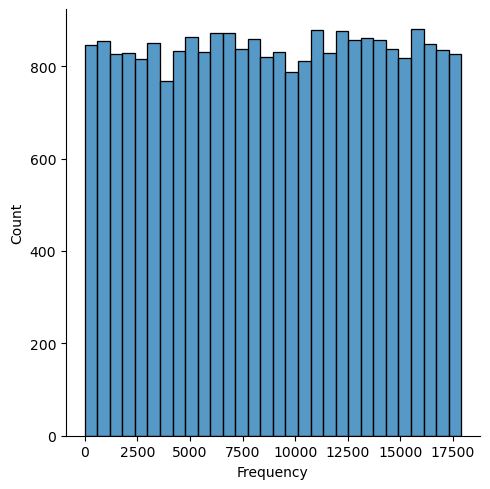

<Figure size 640x480 with 0 Axes>

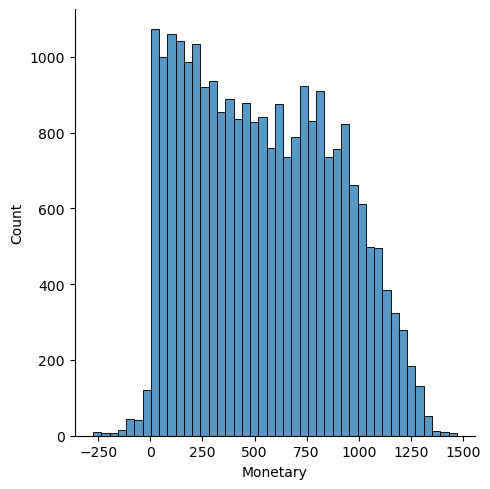

<Figure size 640x480 with 0 Axes>

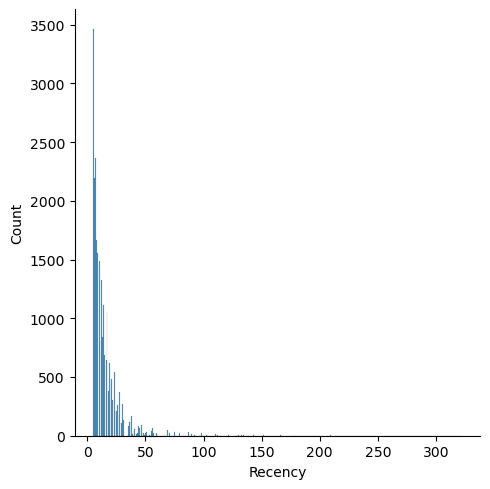

In [25]:
columns=['Frequency', 'Monetary', 'Recency']
for i in columns:
    plt.figure()
    sns.displot(rfm[i])

<Figure size 640x480 with 0 Axes>

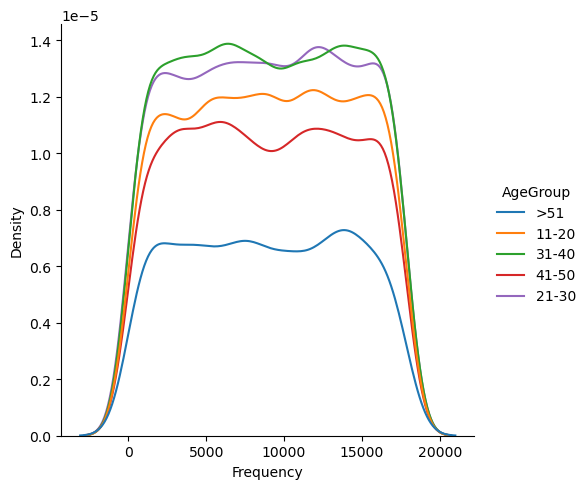

<Figure size 640x480 with 0 Axes>

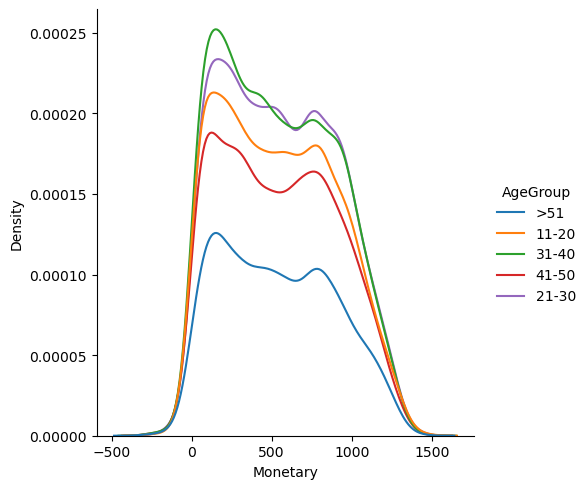

<Figure size 640x480 with 0 Axes>

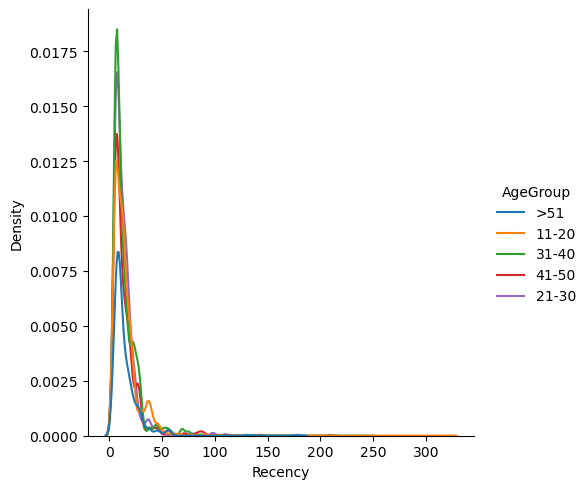

In [26]:
columns= ['Frequency', 'Monetary','Recency']
for i in columns:
    plt.figure()
    sns.displot(data=rfm,hue='AgeGroup', x=i, kind='kde')

<Figure size 640x480 with 0 Axes>

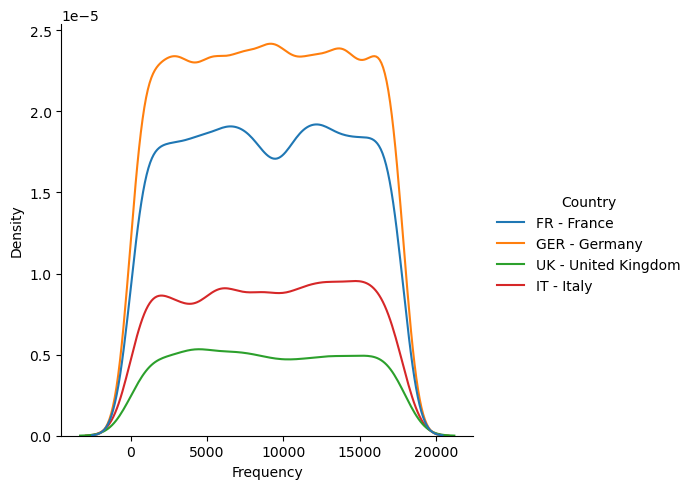

<Figure size 640x480 with 0 Axes>

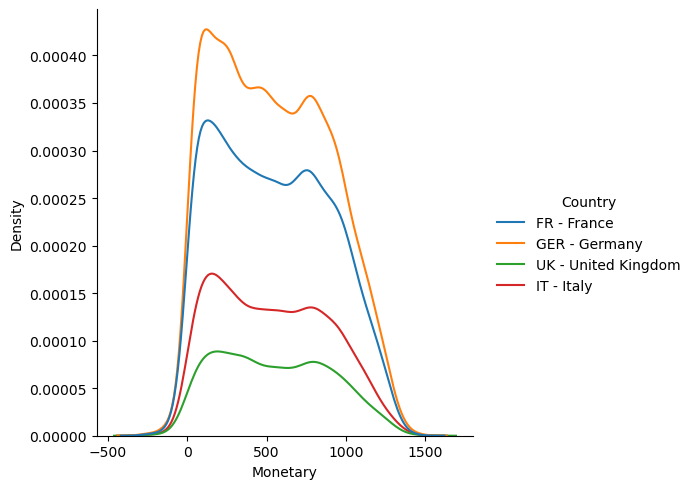

<Figure size 640x480 with 0 Axes>

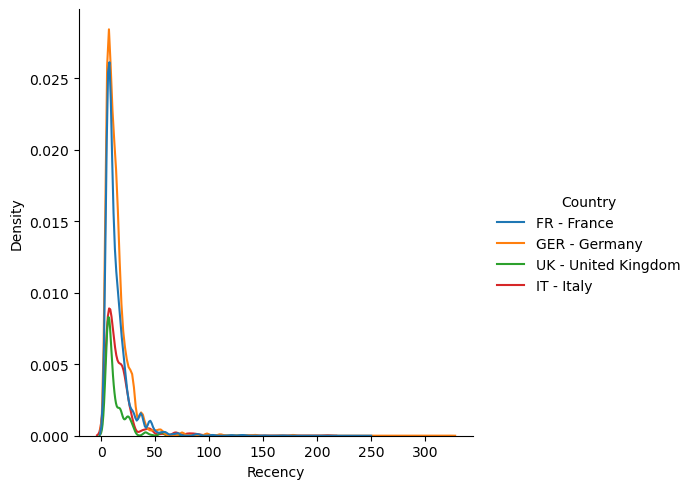

In [27]:
columns= ['Frequency', 'Monetary','Recency']
for i in columns:
    plt.figure()
    sns.displot(data=rfm,hue='Country', x=i, kind='kde')

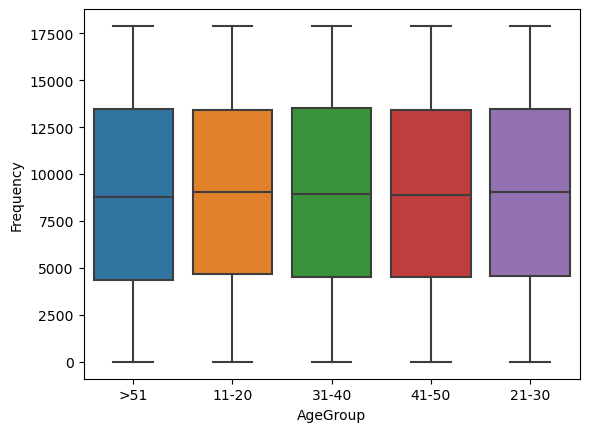

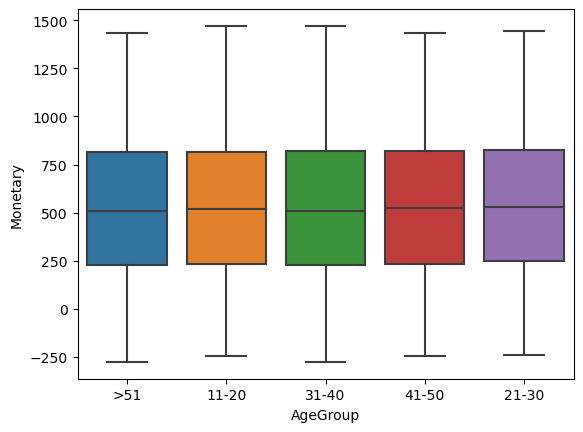

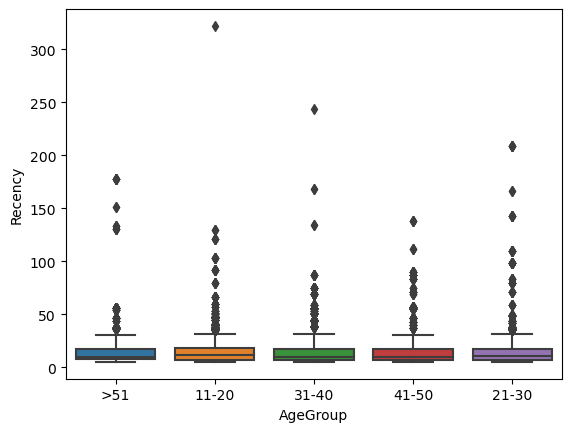

In [28]:
# boxplot
for i in columns:
    plt.figure()
    sns.boxplot(data=rfm, x='AgeGroup', y=rfm[i])

In [29]:
rfm['AgeGroup'].value_counts()

31-40    6068
21-30    5954
11-20    5339
41-50    4787
>51      3065
Name: AgeGroup, dtype: int64

In [30]:
rfm['Country'].value_counts()

GER - Germany          10623
FR - France             8280
IT - Italy              4049
UK - United Kingdom     2261
Name: Country, dtype: int64

In [106]:
# Percentage of each age segment by country
pd.crosstab(rfm['Country'],rfm['AgeGroup'], normalize='index').round(3)*100

AgeGroup,11-20,21-30,31-40,41-50,>51
Country,,,,,
FR - France,20.7,23.5,25.4,18.0,12.4
GER - Germany,21.5,24.8,23.7,17.2,12.7
IT - Italy,16.8,22.4,24.4,26.2,10.2
UK - United Kingdom,29.2,20.7,20.2,17.8,12.0


### Bivariate Analysis

In [32]:
rfm_sub=rfm[['Recency','Frequency','Monetary','AgeGroup']]

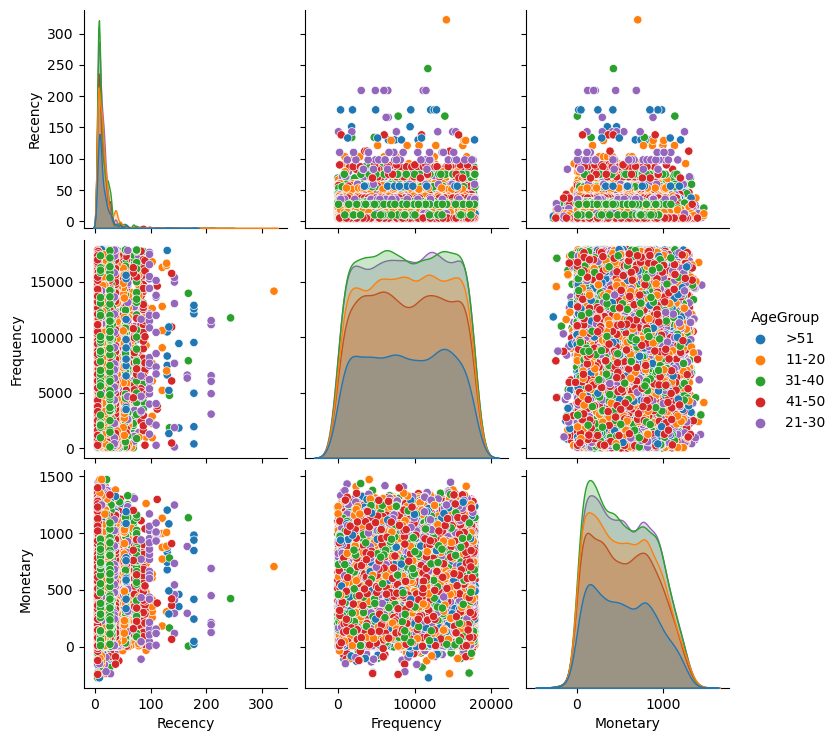

In [34]:

sns.pairplot(rfm_sub, hue='AgeGroup')

### Multivariate Clustering

In [65]:
rfm_only=rfm[['Recency','Frequency','Monetary']]

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled=scaler.fit_transform(rfm_only)

In [66]:
from sklearn.cluster import KMeans
inertia_scores=[]

for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(scaled)
    inertia_scores.append(kmeans.inertia_)
    


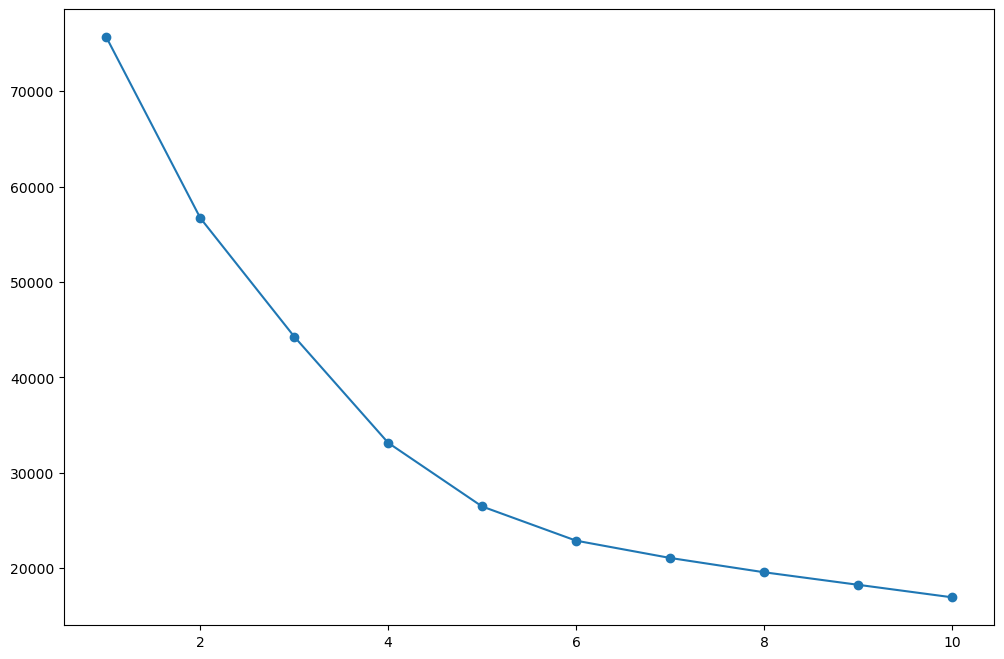

In [67]:
plt.figure(figsize=(12,8))
plt.plot(range(1,11), inertia_scores, marker="o")

from elbow method chart, i decide to choose n_clusters=3

In [68]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(scaled)
rfm['Clusters']=(kmeans.labels_+1)
rfm

,CustomerID,Frequency,Monetary,Country,AgeGroup,Recency,Clusters,Rank
0,0,352,309,FR - France,>51,9,1,GOLD
1,0,3433,472,FR - France,>51,9,1,GOLD
2,0,11162,191,FR - France,>51,9,2,SILVER
3,0,13011,204,FR - France,>51,9,2,SILVER
4,0,13885,1138,FR - France,>51,9,2,SILVER
...,...,...,...,...,...,...,...,...
25208,769,10053,835,GER - Germany,31-40,10,2,SILVER
25209,769,13162,887,GER - Germany,31-40,10,2,SILVER
25210,769,8727,139,GER - Germany,31-40,10,2,SILVER
25211,769,13065,740,GER - Germany,31-40,10,2,SILVER


In [72]:
# Group by Clusters to see the general
rfm.groupby('Clusters').agg({'CustomerID':'count','Frequency':'mean','Recency':'mean','Monetary':'mean'}).round(0)

,CustomerID,Frequency,Recency,Monetary
Clusters,,,,
1,11946,4508.0,12.0,555.0
2,11871,13470.0,12.0,526.0
3,1396,8867.0,54.0,548.0


In 3 clusters : có aerage money expense is similar in range of 527$ - 554$ / user/
The average money expense is similar in range of 527$-554$/ customer in 3 clusters. It means in average, one customer purchase that much. But how they purchase ? What fashion segment is their favor ? We shed light on it in the following.

Based on the upper chart, Clusters has differemt in frequency and recency. Then I create scatterplot for Frequency & Rececncy


<Axes: xlabel='Frequency', ylabel='Recency'>

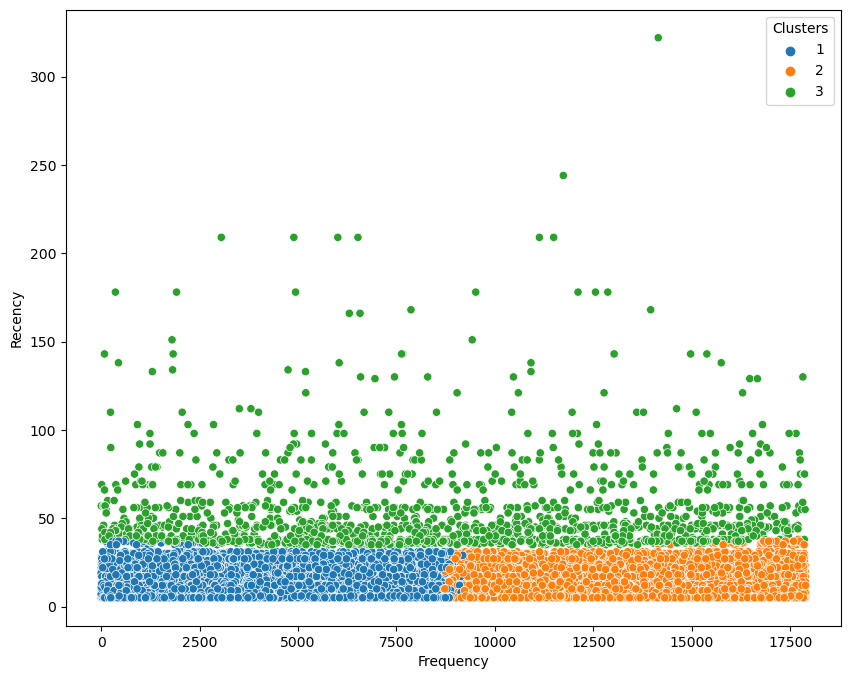

In [73]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=rfm, x='Frequency',y='Recency', hue='Clusters', palette='tab10')


1. **Cluster 1** (blue): recent purchase, average expense/user, average quantity -> interested in average-high fashion brand segment.

2. **Cluster 2** (orange): recent purchse, average expense/user, high quantity -> interested in average-low fashion brand segment.

3. **Cluster 3** (green): not recent purchase, average expense/user, low quantity -> interested in the low-price item (eg accesorise...).

 Now, I go further to get the insight of Cluster

In [107]:
# Create contigency table
rfm.head()
pivot_=pd.crosstab(rfm['Country'], rfm['Clusters'],values=rfm['CustomerID'], aggfunc='count', margins=False, normalize='index').round(3)*100
pivot_.head()

Clusters,1,2,3
Country,,,
FR - France,47.1,46.5,6.4
GER - Germany,47.5,47.8,4.7
IT - Italy,46.0,46.7,7.4
UK - United Kingdom,50.2,46.6,3.3


- There is a similar clusters ratio between different market but UK.

- Customer in **UK have a tendency to** choose average high fashion brand slightly higer than other(50% compared to ~46%), and they least interested in low price item(only 3%.)

In [102]:
# create contigency table(2)
rfm.head()
pivot_=pd.crosstab(rfm['Country'], [rfm['Clusters'], rfm['AgeGroup']],values=rfm['CustomerID'], aggfunc='count', margins=False, normalize='index').round(3)*100
pivot_.head()

Clusters                1                            2                         \
AgeGroup            11-20 21-30 31-40 41-50  >51 11-20 21-30 31-40 41-50  >51   
Country                                                                         
FR - France           9.1  11.5  11.8   8.9  5.9   9.9  11.3  11.7   8.2  5.4   
GER - Germany        10.1  11.6  11.6   8.1  6.2   9.9  12.0  11.5   8.2  6.3   
IT - Italy            6.4  10.2  11.8  12.5  5.1   7.8  10.7  10.8  12.4  5.0   
UK - United Kingdom  14.9  10.3  10.4   9.2  5.5  12.8  10.4   9.8   8.7  4.8   

Clusters                3                         
AgeGroup            11-20 21-30 31-40 41-50  >51  
Country                                           
FR - France           1.8   0.7   1.9   0.9  1.0  
GER - Germany         1.5   1.3   0.7   0.9  0.3  
IT - Italy            2.7   1.5   1.7   1.4  0.2  
UK - United Kingdom   1.5   0.0   0.0   0.0  1.7

Detail in age range:
- **11-20** : Adolescence generation in UK pay more attention to Fashion more than other country(15%), double than Italia does(6.5%)
- **21-30** : no significant in countries
- **41 - 50**: In Italia, U50 has slightly higher concern about Fashion slighly higher than other age range. Ageing population might be a reason for this trend
- **Over 51** : least interested in fashion compare to others age group in all country